In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [15]:
df = pd.read_csv('/Users/Алишер/Downloads/Mall_Customers.csv')

In [17]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
df.rename(columns={'Genre':'Gender'})

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [35]:
X = df[['Age', 'Annual Income (k$)','Spending Score (1-100)']]

In [37]:
wcss=[]
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

In [39]:
wcss

[308812.77999999997,
 221087.19627192983,
 158518.39427916257,
 104366.15145556198,
 75493.84464013917,
 58336.739392796364,
 54924.210693639056,
 51780.13737057184,
 40798.687746566015,
 38612.6806893107]

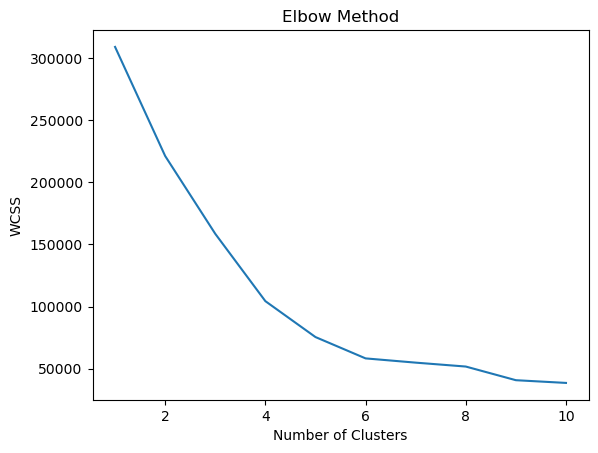

In [41]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [43]:
k_means = KMeans(n_clusters=4,random_state=42)
y_means = k_means.fit_predict(X)

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
y_means

array([2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

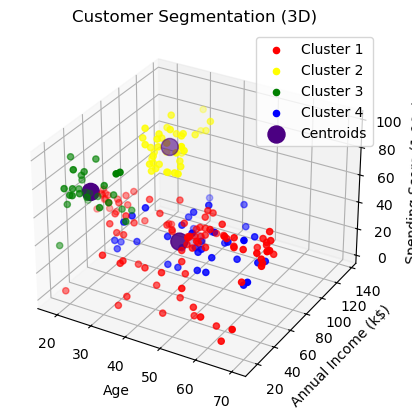

In [47]:
kplot = plt.axes(projection='3d')
kplot.scatter3D(X.iloc[y_means == 0, 0], X.iloc[y_means == 0, 1], X.iloc[y_means == 0, 2], c='red', label="Cluster 1")
kplot.scatter3D(X.iloc[y_means == 1, 0], X.iloc[y_means == 1, 1], X.iloc[y_means == 1, 2], c='yellow', label="Cluster 2")
kplot.scatter3D(X.iloc[y_means == 2, 0], X.iloc[y_means == 2, 1], X.iloc[y_means == 2, 2], c='green', label="Cluster 3")
kplot.scatter3D(X.iloc[y_means == 3, 0], X.iloc[y_means == 3, 1], X.iloc[y_means == 3, 2], c='blue', label="Cluster 4")

kplot.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], color='indigo', s=150, label="Centroids")

kplot.set_title("Customer Segmentation (3D)")
kplot.set_xlabel("Age")
kplot.set_ylabel("Annual Income (k$)")
kplot.set_zlabel("Spending Score (1-100)")
kplot.legend()
plt.show()